In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
df=pd.read_csv('CPC_201907_202002.csv', index_col=0)

In [2]:
df= df.drop("PA",1)
df= df.drop("Latitude",1)
df= df.drop("Longitude",1)
df.reset_index(inplace = True)
df = df.drop(df[(df["TM"]<=0)|(df["GI"]<0)|(df["today_ETU"]<0)].index)
df = pd.get_dummies(df,columns=['STATION_ID'])
df.sort_values(by=["today_ETU"],ascending = True)

#削掉datetime的年月日，再轉成數字
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
df['OBS_DATETIME'] = pd.to_datetime(df['OBS_DATETIME']).dt.time
#只考慮一天的時間分布,把每一分鐘轉成整數
labelencoder = LabelEncoder()
df['OBS_DATETIME'] = labelencoder.fit_transform(df['OBS_DATETIME'])
#把today_ETU放到第一個column
cols = list(df)
cols.insert(0,cols.pop(cols.index('today_ETU')))
df = df.loc[:,cols]
df

,today_ETU,OBS_DATETIME,GI,TM,STATION_ID_CPC_D414Z01,STATION_ID_CPC_D416H01,STATION_ID_CPC_D432101,STATION_ID_CPC_D432102,STATION_ID_CPC_D434V01,STATION_ID_CPC_L500102,STATION_ID_CPC_N001F01,STATION_ID_CPC_U000101,STATION_ID_CPC_U000102
0,0.000,0,0.0,25.0,1,0,0,0,0,0,0,0,0
1,0.000,1,0.0,25.0,1,0,0,0,0,0,0,0,0
2,0.000,2,0.0,25.0,1,0,0,0,0,0,0,0,0
3,0.000,3,0.0,25.0,1,0,0,0,0,0,0,0,0
4,0.000,4,0.0,25.0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2736450,801.147,866,0.0,23.0,0,0,0,0,0,0,0,0,1
2736451,801.147,867,0.0,23.0,0,0,0,0,0,0,0,0,1
2736452,801.147,868,0.0,23.0,0,0,0,0,0,0,0,0,1
2736453,801.147,869,0.0,22.0,0,0,0,0,0,0,0,0,1


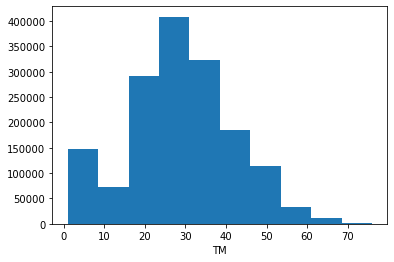

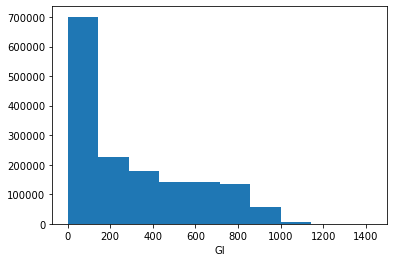

In [3]:
cols[1:]
plt.hist(df["TM"])
plt.xlabel("TM")
plt.show()
plt.hist(df["GI"])
plt.xlabel("GI")
plt.show()

In [4]:
# df['STATION_ID'] = labelencoder.fit_transform(df['STATION_ID'])
# df.groupby('STATION_ID').nunique()

In [3]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error

In [4]:
#只考慮一天的時間分布
X= df.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12]].values
X = X.reshape(-1,12)
y = df.iloc[:,0].values
y = y.reshape(-1,1)
# X = scale(X)
# y = scale(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [7]:
regr=linear_model.LinearRegression()
regr.fit(X_train, y_train)
print('Training Score: ',regr.score(X_train,y_train))
print('Testing Score: ',regr.score(X_test,y_test))

In [8]:
# clf_lasso=linear_model.Lasso(alpha=1)
# clf_lasso.fit(X_train,y_train)
# print('Training Score: ',clf_lasso.score(X_train,y_train))
# print('Testing Score: ',clf_lasso.score(X_test,y_test))

In [9]:
# clf_ridge=linear_model.Ridge(alpha=1)
# clf_ridge.fit(X_train,y_train)
# print('Training Score: ',clf_ridge.score(X_train,y_train))
# print('Testing Score: ',clf_ridge.score(X_test,y_test))

In [10]:
#SGD is super sensitive to scalar
sgdr = linear_model.SGDRegressor( alpha=0.0001,epsilon=0.01,learning_rate ='adaptive',penalty='l2',
                                 early_stopping = True,validation_fraction = 0.5,average = True)
y_train = np.ravel(y_train)
sgdr.fit(X_train, y_train)
print('Training Score: ',sgdr.score(X_train,y_train))
print('Testing Score: ',sgdr.score(X_test,y_test))

print(sgdr.coef_)
print(sgdr.n_iter_)


# y_pred = regr.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# print("MSE: ", mse)
# print("RMSE: ", mse*(1/2.0))

# x_ax = range(len(y_test))
# plt.plot(x_ax, y_test, label="original")
# plt.plot(x_ax, y_pred, label="predicted")
# plt.title("Boston test and predicted data")
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis')
# plt.legend(loc='best',fancybox=True, shadow=True)
# plt.grid(True)
# plt.show()

Training Score:  -1.134207953048782e+18
Testing Score:  -1.1295990848233766e+18
[ 4.91488640e+08  1.17942643e+08 -9.72932845e+08 -3.97094411e+10
  2.41867861e+11 -1.16293502e+11 -2.31091494e+09 -6.76966406e+10
  1.35933234e+11  1.78221031e+11  6.59358843e+10 -1.05380846e+10]
47


In [6]:
%%time
import xgboost as xgb
xgbr=xgb.XGBRegressor(learning_rate = 0.1)
xgbr.fit(X_train, y_train)
print('Training Score: ',xgbr.score(X_train,y_train))
print('Testing Score: ',xgbr.score(X_test,y_test))
xgbr.feature_importances_

Training Score:  0.9198398714828903
Testing Score:  0.9194666516817943


array([0.0484384 , 0.00315274, 0.00325677, 0.00605955, 0.00691351,
       0.09497139, 0.3992927 , 0.00642184, 0.02159348, 0.01850906,
       0.2520669 , 0.13932362], dtype=float32)

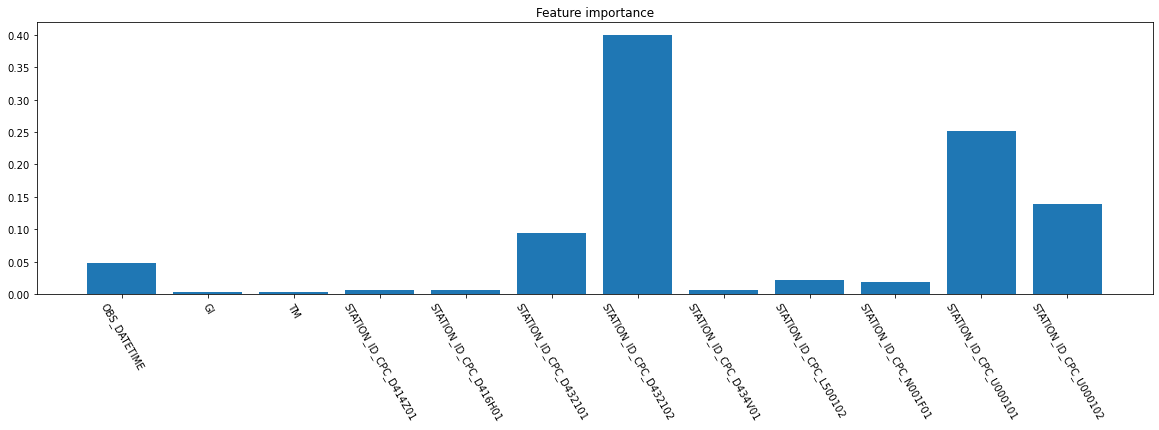

In [12]:
import shap
cols=["OBS_DATETIME",
      "GI", 
      "TM",
      "STATION_ID_CPC_D414Z01",
      "STATION_ID_CPC_D416H01",
      "STATION_ID_CPC_D432101",
      "STATION_ID_CPC_D432102",
      "STATION_ID_CPC_D434V01",
      "STATION_ID_CPC_L500102",
      "STATION_ID_CPC_N001F01",
      "STATION_ID_CPC_U000101",
      "STATION_ID_CPC_U000102"]
plt.figure(figsize=(20, 5))
plt.bar(range(len(cols)), xgbr.feature_importances_)
plt.xticks(range(len(cols)), cols, rotation=-60, fontsize=10)
plt.title('Feature importance', fontsize=12)
plt.show()

In [13]:
# explainer = shap.TreeExplainer(xgbr)
# shap_values = explainer.shap_values(X_test) //這邊應該是X_test 
# print(shap_values.shape)
#會跑很久

In [14]:
shap_values = shap.TreeExplainer(xgbr).shap_values(X_test)
# shap_interaction_values = shap.TreeExplainer(xgbr).shap_interaction_values(X_test) //這個跑不動超扯

# Summart Plot
## shap value的意義是「擁有此特徵」相比「沒有此特徵」，對模型的預測值的影響是增加還是減少
### 1.這張圖解釋用XGB模型預測X_test data時，排在第一的OBS_DATETIME總體來說對模型的影響是最大的，影響的廣度也是最廣的
### 2.排在二三四名的features是地理位置的分布(這邊放地圖 基本上位於西南靠海 溫度很高)，也就是說若樣本是位於這三個地方的時候，模型對於預測值直線上升的機率大幅增加，特別是station U101這地方對於，對於預測值的正向影響可以說是平均最大
### 3...

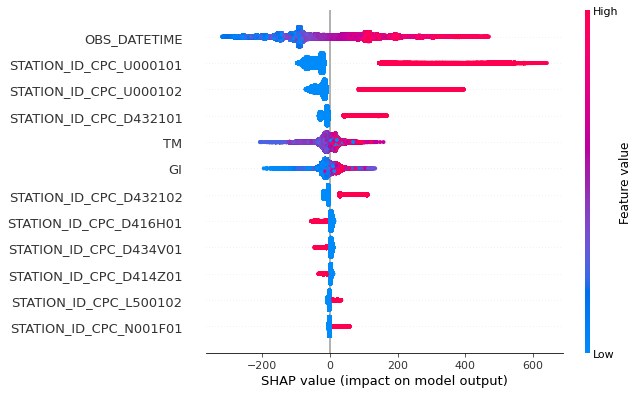

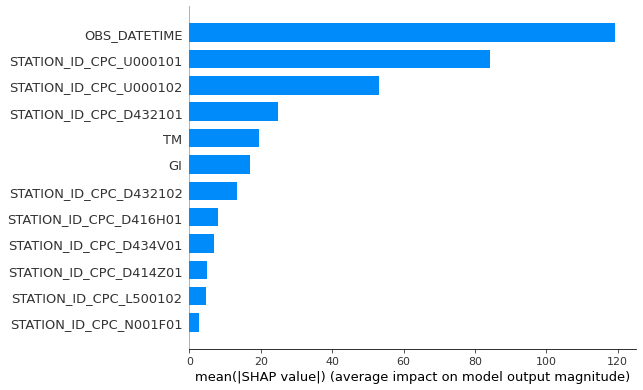

In [15]:
X_test = pd.DataFrame(X_test)
X_test.columns = cols
shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar")

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


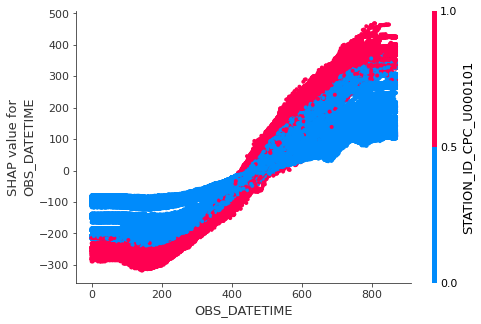

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


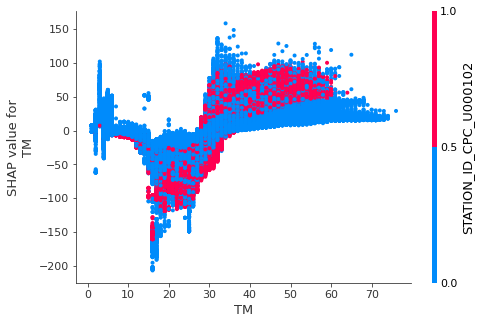

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


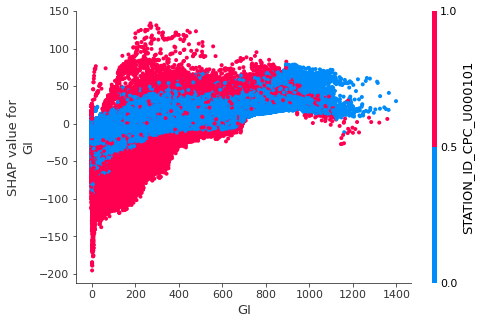

In [16]:
shap.dependence_plot( 'OBS_DATETIME',shap_values, X_test,interaction_index='auto')
shap.dependence_plot( 'TM'          ,shap_values, X_test,interaction_index='auto')
shap.dependence_plot( 'GI'          ,shap_values, X_test, interaction_index='auto')

In [17]:
shap.initjs()

In [18]:
explainer = shap.TreeExplainer(xgbr)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

In [19]:
shap.force_plot(explainer.expected_value, shap_values[0:500,:], X_test.iloc[0:500,:])

shap.plots.force is slow for many thousands of rows, try subsampling your data.


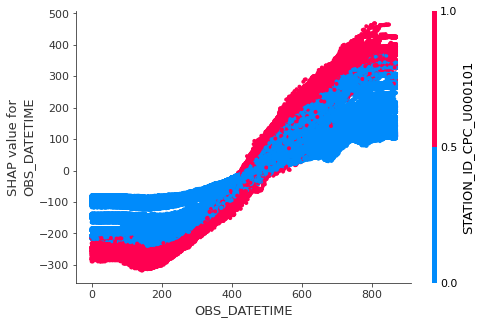

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


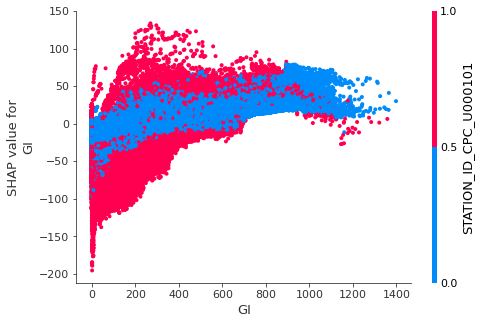

Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.


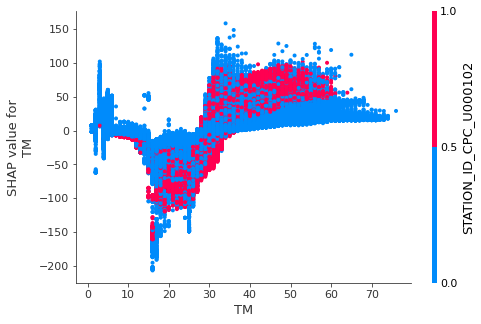

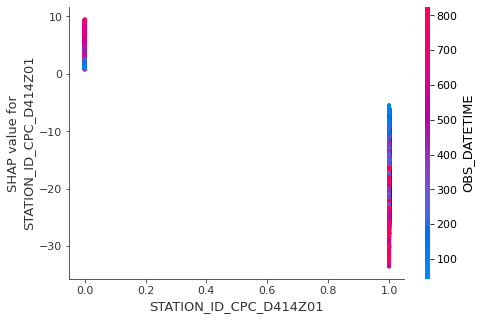

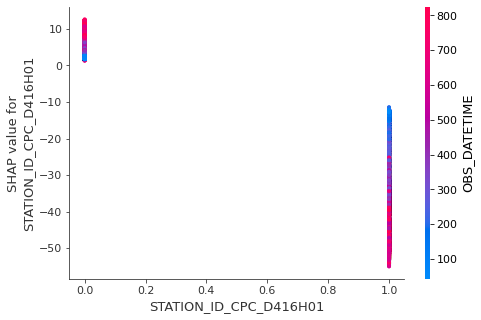

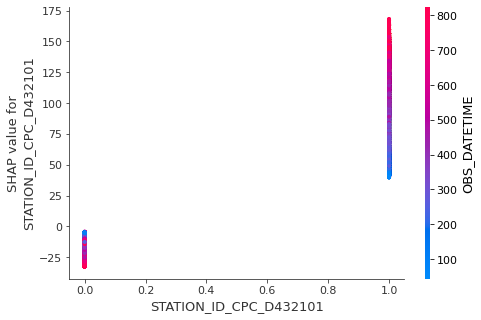

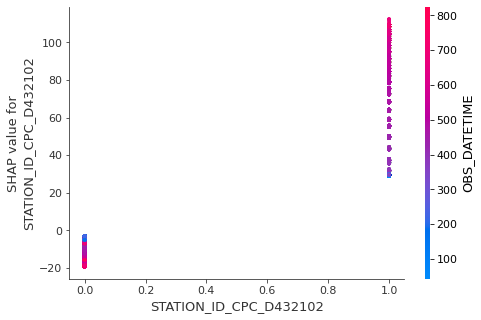

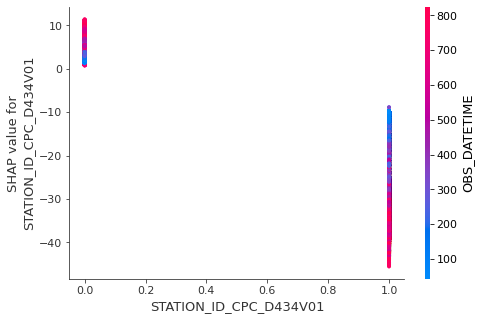

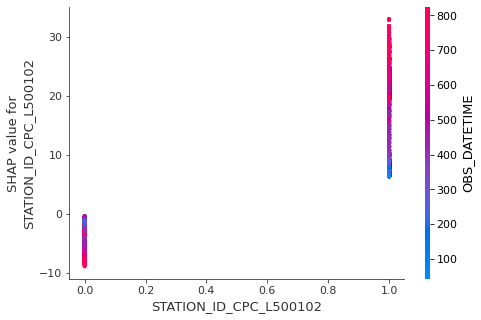

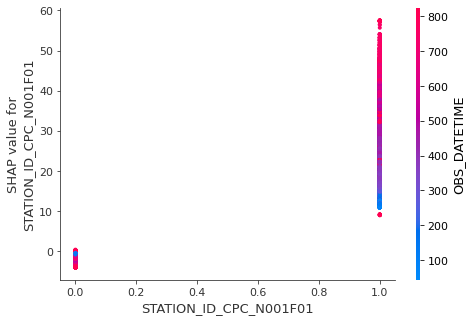

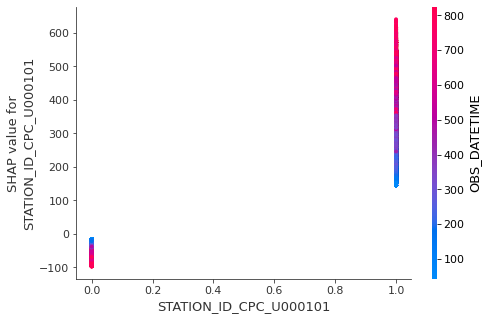

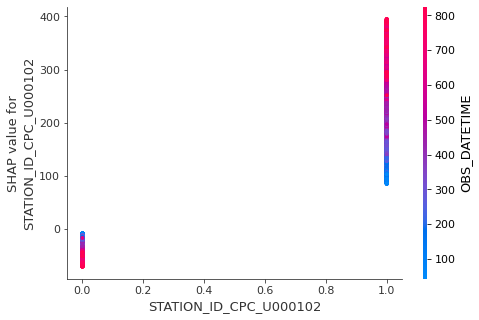

In [36]:
#12個dependency圖
for i in cols:
     shap.dependence_plot( i,shap_values, X_test, interaction_index='auto')


In [7]:
import lime
import lime.lime_tabular
explainer = lime.lime_tabular.LimeTabularExplainer(X_train, feature_names=cols,training_labels = y_train,
                                                   verbose=True, mode='regression')

In [9]:
X_train

array([[647., 217.,  29., ...,   0.,   0.,   0.],
       [ 46.,   0.,  21., ...,   0.,   0.,   0.],
       [761.,  15.,  25., ...,   0.,   0.,   0.],
       ...,
       [368., 768.,  50., ...,   0.,   0.,   0.],
       [484., 660.,  45., ...,   0.,   0.,   1.],
       [865.,   0.,  23., ...,   0.,   0.,   0.]])

In [12]:
#i 要小於477055，X_test有477055筆
i = 455040
exp = explainer.explain_instance(X_test[i], xgbr.predict, num_features=12)


Intercept 767.6704878263533
Prediction_local [-17.90159207]
Right: 14.592559


In [13]:
exp.show_in_notebook(show_table=True)

TypeError: Object of type float32 is not JSON serializable